# Phase 2

In [348]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, classification_report
from sklearn.decomposition import PCA
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [349]:
data = pd.read_csv('data/post_eda_consumer_data.csv')
data.head()

,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Last_Purchase,Wines,Fruits,Meat,Fish,...,Response,Children,Age,Customer_From,Total_Spending,Luxury_Spending,Necessity_Spending,Need_Attention,Luxury_Consumer,CLV
0,1957,0,1,0.50,2012-09-04,58,635,88,546,172,...,1,0,66,3771,1617,723,894,1,0,0.428799
1,1954,0,1,0.40,2014-03-08,38,11,1,6,2,...,0,2,69,3221,27,17,10,1,1,0.008382
2,1965,0,0,0.62,2013-08-21,26,426,49,127,111,...,0,0,58,3420,776,468,308,0,1,0.226901
3,1984,0,0,0.22,2014-02-10,26,11,4,20,10,...,0,1,39,3247,53,16,37,0,0,0.016323
4,1981,1,0,0.51,2014-01-19,94,173,43,118,46,...,0,1,42,3269,422,188,234,1,0,0.129091


### Feature Engineering from EDA in phase 1

In [350]:
data['Total_Spending'] = data['Wines'] + data['Fruits'] + data['Meat'] + data['Fish'] + data['Sweet'] + data['Gold']
data['Luxury_Spending'] = data['Wines'] + data['Gold']
data['Necessity_Spending'] = data['Fruits'] + data['Meat'] + data['Fish'] + data['Sweet']
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])

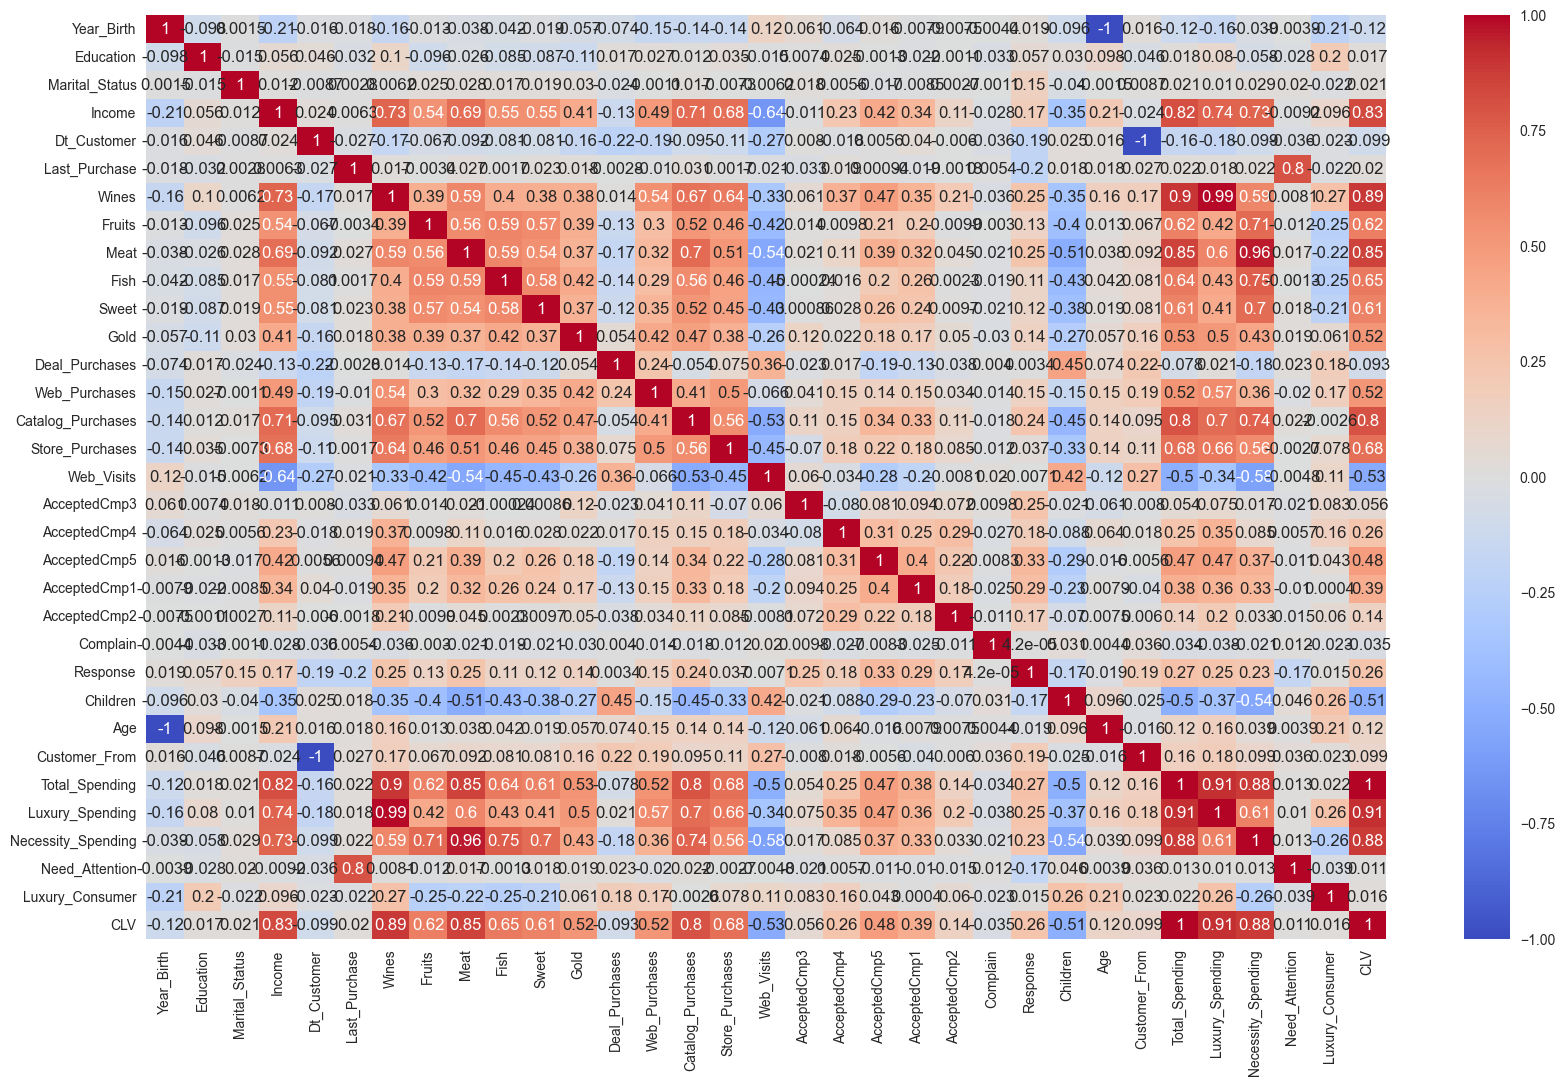

In [351]:
# Correlation matrix
correlationMatrix = data.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(20, 12))
sns.heatmap(correlationMatrix, annot=True, cmap='coolwarm')
plt.show()

## Models that we will use
1. Linear Regression
2. KNN
3. Decision Tree
4. K-Means - Age Group
5. Logistic Regression
6. Gradient Boosting


## Linear Regression

In [352]:
linear_regression_X = data[['Income', 'Children', 'Age','Marital_Status', 'Web_Visits', 'Response', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Deal_Purchases', 'Web_Purchases', 'Catalog_Purchases', 'Store_Purchases']]
linear_regression_y = data['Total_Spending']

lnr_X_train, lnr_X_test, lnr_y_train, lnr_y_test = train_test_split(linear_regression_X, linear_regression_y, test_size=0.1, random_state=42)

In [353]:
lnr = LinearRegression()
lnr.fit(lnr_X_train, lnr_y_train)

lnr_y_pred = lnr.predict(lnr_X_test)
mse = mean_squared_error(lnr_y_test, lnr_y_pred)
print(f"Linear Regression Mean Squared Error: {mse:.4f}")

Linear Regression Mean Squared Error: 59942.7681


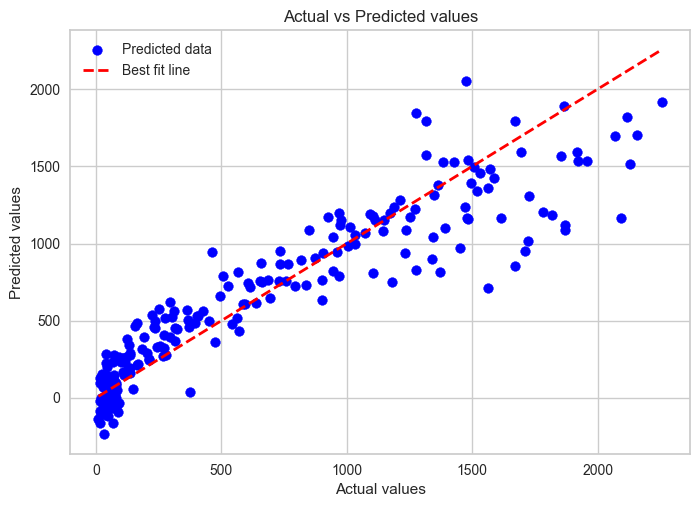

In [354]:
# Plotting actual vs predicted values
plt.scatter(lnr_y_test, lnr_y_pred, color='blue', label='Predicted data')
plt.plot([min(lnr_y_test), max(lnr_y_test)], [min(lnr_y_test), max(lnr_y_test)], linestyle='--', color='red', linewidth=2, label='Best fit line')
plt.title('Actual vs Predicted values')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.legend()
plt.show()

## Logistic Regression

In [355]:
logistic_regression_data = data[['Income', 'Wines', 'Fruits', 'Meat', 'Fish', 'Sweet', 'Gold', 'Age', 'Customer_From', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Deal_Purchases', 'Web_Purchases', 'Catalog_Purchases', 'Store_Purchases', 'Web_Visits', 'Response']]
logistic_regression_X = logistic_regression_data.drop(columns=['Response'])
logistic_regression_y = logistic_regression_data[['Response']]

lgr_X_train, lgr_X_test, lgr_y_train, lgr_y_test = train_test_split(logistic_regression_X, logistic_regression_y, test_size=0.2, random_state=42)

In [356]:
lgr = LogisticRegression()
lgr.fit(lgr_X_train, lgr_y_train)


lgr_y_pred = lgr.predict(lgr_X_test)

accuracy = accuracy_score(lgr_y_test, lgr_y_pred)
print('Accuracy Score for logistic regression on Response is ', accuracy*100)

Accuracy Score for logistic regression on Response is  87.21973094170403


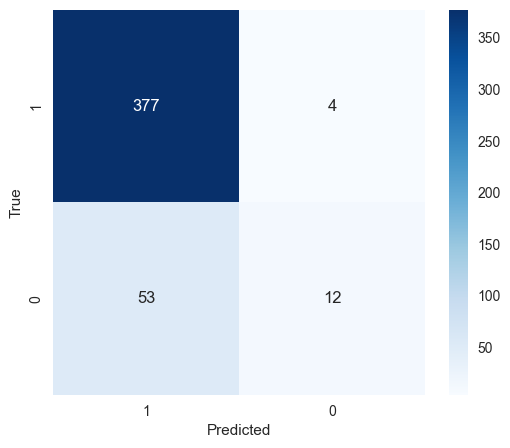

In [357]:
logistic_regression_confusion_matrix = confusion_matrix(lgr_y_test, lgr_y_pred)
plt.figure(figsize=(6, 5))
classes = logistic_regression_data['Response'].unique()
sns.heatmap(logistic_regression_confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## K-Means Clustering

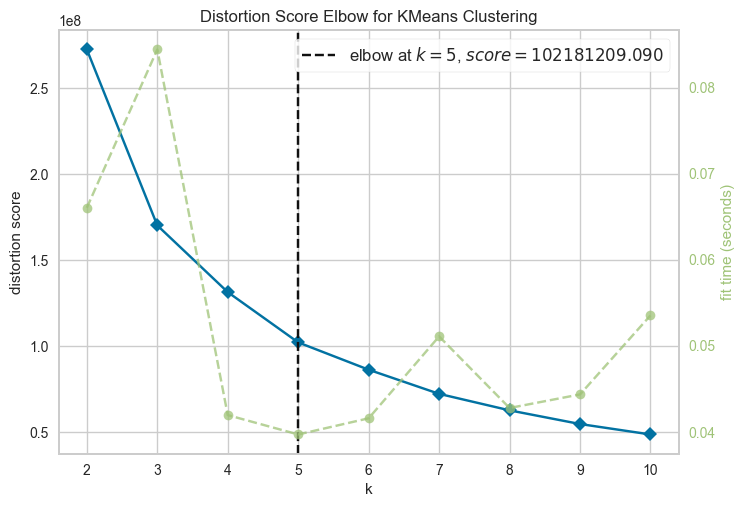

In [358]:
kmeans = KMeans()
k_means_data = data[['Customer_From', 'Total_Spending']]
optimal_k_finder = KElbowVisualizer(kmeans, k=10)
optimal_k_finder.fit(k_means_data)
optimal_k_finder.show()

plt.show()

Text(0, 0.5, 'Total_Spending')

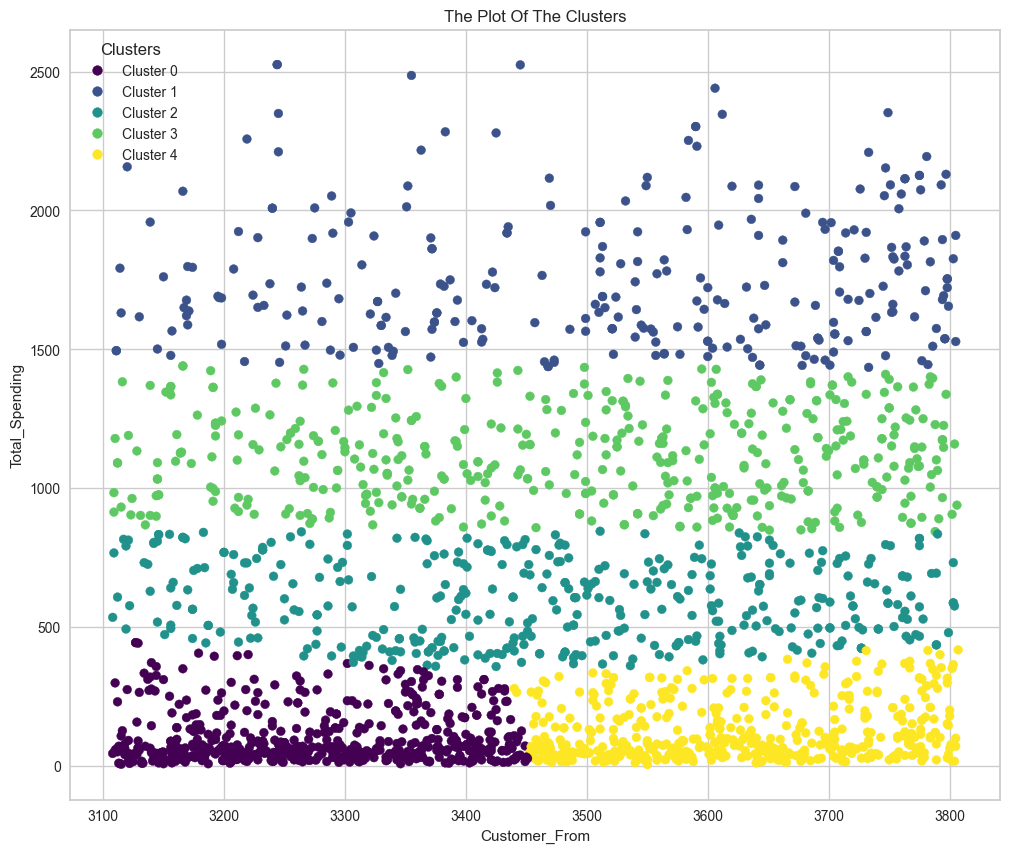

In [359]:
kmeans = KMeans(n_clusters=5)
data['Cluster'] = kmeans.fit_predict(k_means_data)
fig = plt.figure(figsize=(12,10))
ax = plt.subplot(111, label="bla")
# data['Cluster'] = data['Cluster'].map({0: 'Level1', 1: 'Level2', 2: 'Level3'})
# scatter_plot = ax.scatter(data['Customer_From'], data['Total_Spending'], data['Last_Purchase'], s=40, c=data['Cluster'], marker='o', cmap = 'viridis' )
scatter_plot = ax.scatter(data['Customer_From'], data['Total_Spending'], s=40, c=data['Cluster'], marker='o', cmap = 'viridis' )
ax.set_title("The Plot Of The Clusters")
legend_labels = [f'Cluster {i}' for i in range(len(set(data['Cluster'])))]
ax.legend(handles=scatter_plot.legend_elements()[0], labels=legend_labels, title="Clusters")
ax.set_xlabel('Customer_From')
ax.set_ylabel('Total_Spending')
# ax.set_zlabel('Last_Purchase')

In [360]:
# Drop Cluster column as it was only used for K-means
data = data.drop(columns=['Cluster'])

## KNN

KNN Accuracy: 0.7085


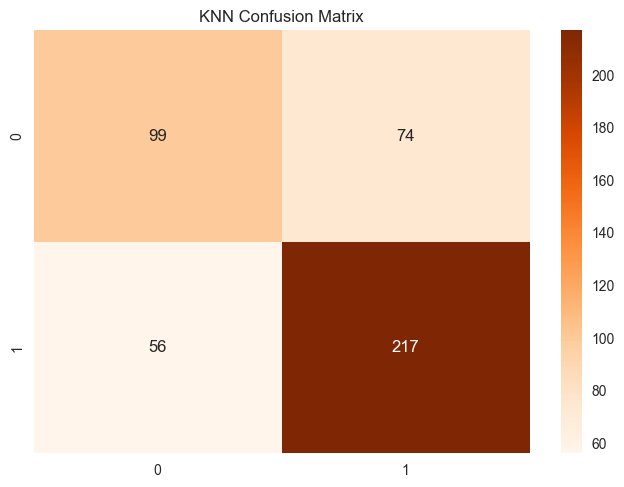

In [361]:
knn_X = data[['Income','Catalog_Purchases','Store_Purchases','Web_Purchases','Age']]
knn_y = data[['Luxury_Consumer']]

knn_X_train, knn_X_test, knn_y_train, knn_y_test = train_test_split(knn_X, knn_y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
knn_X_train_scaled = scaler.fit_transform(knn_X_train)
knn_X_test_scaled = scaler.transform(knn_X_test)

knnClassifier = KNeighborsClassifier(n_neighbors=5)
knnClassifier.fit(knn_X_train_scaled, knn_y_train)


knn_y_pred = knnClassifier.predict(knn_X_test_scaled)

accuracy = accuracy_score(knn_y_test, knn_y_pred)
confusion_mat = confusion_matrix(knn_y_test, knn_y_pred)
print(f"KNN Accuracy: {accuracy:.4f}")
sns.heatmap(confusion_matrix(knn_y_test, knn_y_pred), annot=True, fmt='d', cmap='Oranges')
plt.title('KNN Confusion Matrix')
plt.show()

KNN Accuracy: 0.71


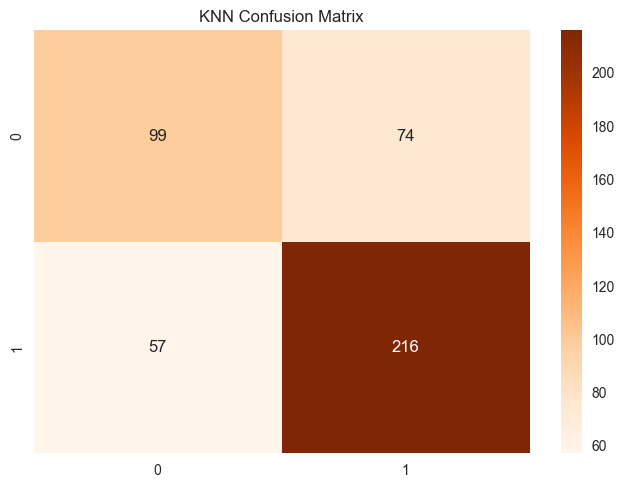

In [362]:
knnClassifier = KNeighborsClassifier(n_neighbors=3)
knnClassifier.fit(knn_X_train_scaled, knn_y_train)
knn_y_pred = knnClassifier.predict(knn_X_test_scaled)

accuracy = accuracy_score(knn_y_test, knn_y_pred)
confusion_mat = confusion_matrix(knn_y_test, knn_y_pred)
print(f"KNN Accuracy: {accuracy:.2f}")
sns.heatmap(confusion_matrix(knn_y_test, knn_y_pred), annot=True, fmt='d', cmap='Oranges')
plt.title('KNN Confusion Matrix')
plt.show()

In [363]:
dt_X = data[['Income', 'Total_Spending']]
dt_y = data[['Need_Attention']]

dt_X_train, dt_X_test, dt_y_train, dt_y_test = train_test_split(dt_X, dt_y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
dt_X_train_scaled = scaler.fit_transform(dt_X_train)
dt_X_test_scaled = scaler.transform(dt_X_test)

## Decision Trees

DT Accuracy: 0.6367713004484304


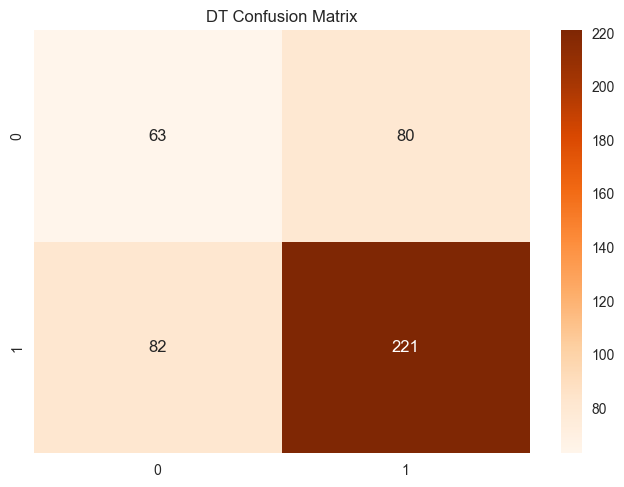

In [364]:
# Decision Trees
decisionTree = DecisionTreeClassifier(random_state=42)
decisionTree.fit(dt_X_train_scaled, dt_y_train)
dt_y_pred = decisionTree.predict(dt_X_test_scaled)

accuracy = accuracy_score(dt_y_test, dt_y_pred)
confusion_mat = confusion_matrix(dt_y_test, dt_y_pred)
print(f"DT Accuracy: {accuracy}")
sns.heatmap(confusion_matrix(dt_y_test, dt_y_pred), annot=True, fmt='d', cmap='Oranges')
plt.title('DT Confusion Matrix')
plt.show()


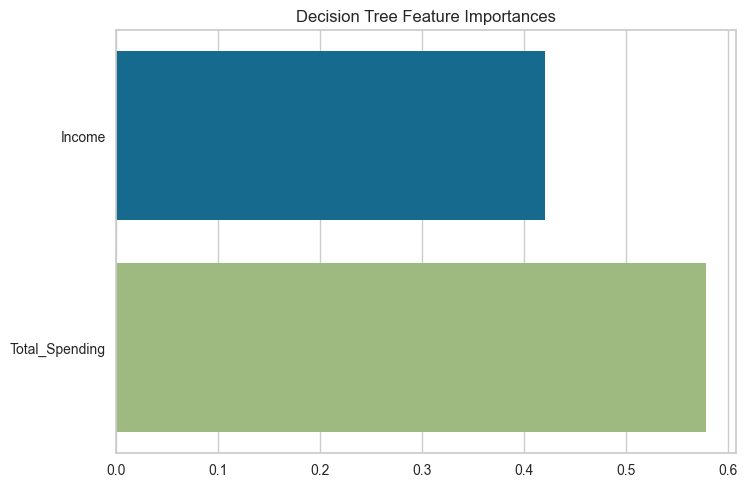

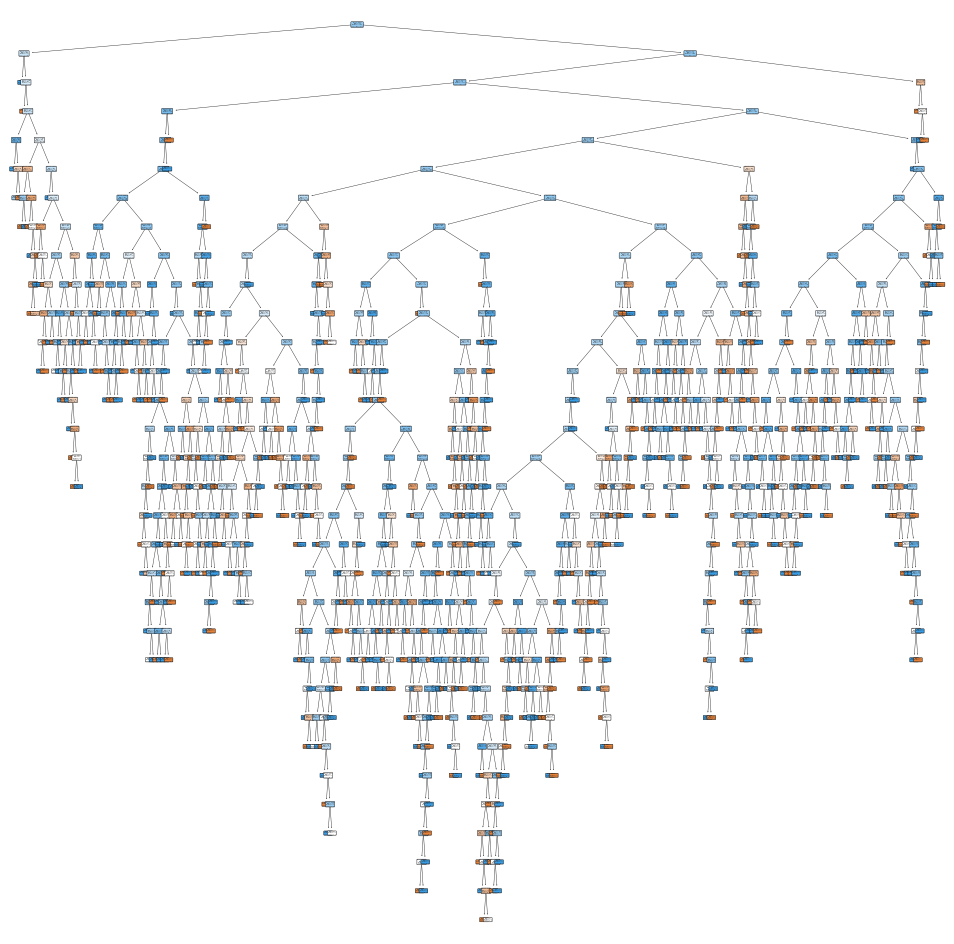

In [365]:
# Visualize decision tree rules
# Visualizing feature importances for Decision Trees
feature_importances = decisionTree.feature_importances_
feature_names = dt_X.columns
sns.barplot(x=feature_importances, y=feature_names)
plt.title('Decision Tree Feature Importances')
plt.show()


# Visualize the decision tree
fig, ax = plt.subplots(figsize=(12, 12))
tree.plot_tree(decisionTree, filled=True, rounded=True)
plt.show()

## Gradient Boosting

GB Accuracy: 0.9238


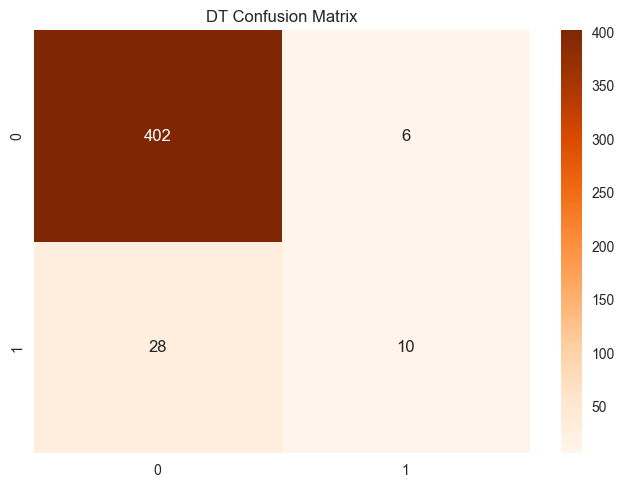

In [366]:
GB_X = data[['Income','Customer_From','Total_Spending']]
GB_y = data[['AcceptedCmp1']]

GB_X_train, GB_X_test, GB_y_train, GB_y_test = train_test_split(GB_X, GB_y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
GB_X_train_scaled = scaler.fit_transform(GB_X_train)
GB_X_test_scaled = scaler.transform(GB_X_test)

gradientBoosting = GradientBoostingClassifier(random_state=42)
gradientBoosting.fit(GB_X_train_scaled, GB_y_train)


GB_y_pred = gradientBoosting.predict(GB_X_test_scaled)

accuracyGB = accuracy_score(GB_y_test, GB_y_pred)
print(f"GB Accuracy: {accuracyGB:.4f}")
sns.heatmap(confusion_matrix(GB_y_test, GB_y_pred), annot=True, fmt='d', cmap='Oranges')
plt.title('DT Confusion Matrix')
plt.show()